## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
data = pd.read_csv('Walmart.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Checking OLS assmption 1 of linearity 

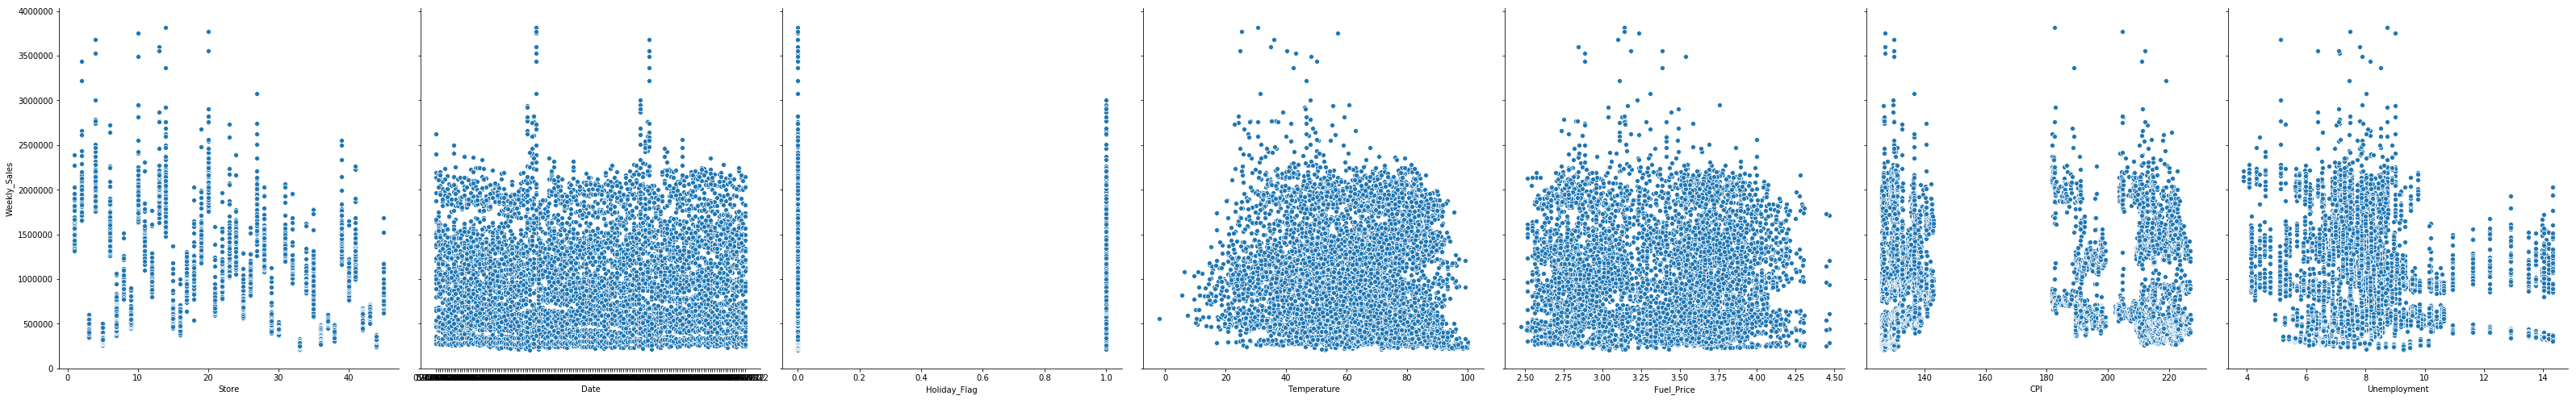

In [4]:
p = sns.pairplot(data, x_vars=['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'], y_vars = 'Weekly_Sales', size = 7, aspect = 0.9)

## Checking ols assumption 2 of multicollinearity

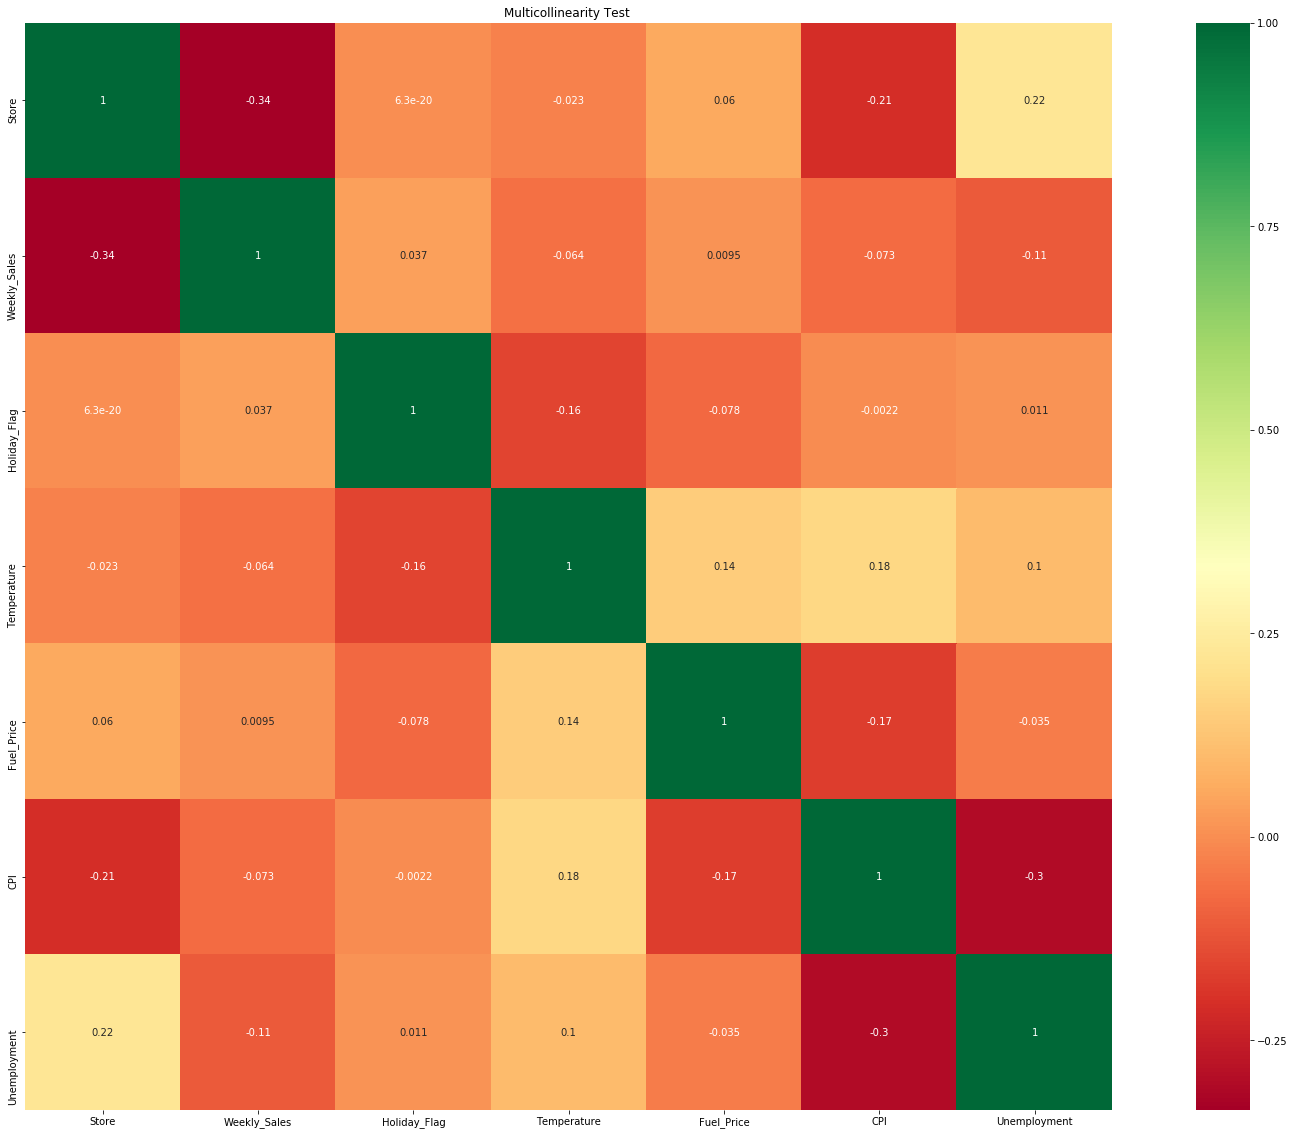

In [5]:
plt.figure(figsize = (30,20))
plt.title('Multicollinearity Test ')
sns.heatmap(data.corr(),annot = True,square=True,cmap='RdYlGn')
plt.show()

## EDA

## Feature engineering the date column

In [6]:
data['Date'].dtype

dtype('O')

In [7]:
# changing the currently coded string to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Date'].dtype

dtype('<M8[ns]')

In [9]:
#extracting year from date 
data['Year'] = data['Date'].dt.year

#extracting month from date 
data['Month'] = data['Date'].dt.month

#extracting day from date 
data['Day'] = data['Date'].dt.day

In [10]:
last_date = data['Date'].max()
last_date

Timestamp('2012-12-10 00:00:00')

In [11]:
date_column = data['Date'].copy()
print(date_column.head()) 

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]


In [12]:
monthly_sales = data.resample('M', on='Date').sum()
monthly_sales

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
Date,,,,,,,,,,
2010-01-31,1035,4.223988e+07,0,3144.06,123.045,7575.961790,381.388,90450,45,450
2010-02-28,4140,1.915869e+08,0,9324.79,493.958,30219.861597,1537.421,361800,360,2520
2010-03-31,4140,1.862262e+08,0,9740.74,507.286,30262.322871,1536.412,361800,540,2970
2010-04-30,4140,1.838118e+08,0,11086.93,516.198,30186.006415,1529.588,361800,720,3375
2010-05-31,6210,2.806119e+08,0,14713.65,766.327,45328.082817,2304.317,542700,1350,3555
2010-06-30,3105,1.424361e+08,0,10455.89,374.927,22690.182743,1144.080,271350,810,2295
2010-07-31,4140,1.842664e+08,0,13716.76,505.106,30223.634816,1520.255,361800,1260,3330
2010-08-31,4140,1.845381e+08,0,13383.78,500.114,30289.052823,1519.246,361800,1440,3150
2010-09-30,4140,1.797041e+08,0,12584.09,499.988,30250.319011,1520.255,361800,1620,2340


In [13]:
data.drop(columns = 'Date', inplace = True)

In [14]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [15]:
x = data.drop(columns=data.columns[1])

In [16]:
y = data.iloc[:,1]

## Checking missing values

In [17]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

## Checking for outliers

In [18]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000


## There are no outliers in our data

## Splitting the data into training and testing set

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Training the model

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(x_test)
np.set_printoptions(precision = 2 )
combined = np.column_stack((y_pred, y_test))
print(combined)


[[1216558.89 1220984.94]
 [1205362.06 1246322.44]
 [ 501946.92  505918.21]
 ...
 [ 782051.68  833429.22]
 [1240633.97 1197019.39]
 [1079984.63 1118163.94]]


## Model evaluation

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def regression_result(y_true, y_pred):
    
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true,y_pred)
    mse = metrics.mean_squared_error(y_true,y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    n = len(y_test)  # Number of test samples
    p = x_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_error: ', mean_squared_error(y_test,y_pred))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mean_absolute_percentage_error(y_test, y_pred),4))
    print(f"Adjusted R-squared: {adjusted_r2}")
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [23]:
regression_result(y_test, y_pred)

explained_variance:  0.9554
mean_squared_error:  14100996145.328173
r2:  0.9554
MAE:  63063.4931
MAPE:  0.0575
Adjusted R-squared: 0.9550709763743807
MSE:  14100996145.3282
RMSE:  118747.6153


## K-fold cross validation

In [27]:
from sklearn.model_selection import cross_val_score
cross_validated_accuracy = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'r2')
print(f'cross validated accuracy is {cross_validated_accuracy}')

cross validated accuracy is [0.95 0.94 0.96 0.95 0.95]
